In [1]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Comp3220/Data.csv")
df.head(10)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.00,0.022222,0.0,0.4,...,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0,False
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.00,0.066667,0.0,0.0,...,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0,False
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.00,0.028571,0.0,0.0,...,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0,False
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.00,0.066667,0.0,0.0,...,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0,False
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.00,0.100000,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,False


In [2]:
df.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [3]:
df.shape

(14731, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

This data set has 14731 rows and 22 columns with 15 float type, 6 object type and 1 boolean type. The data set has alos lots of missing values. But we can drop them due to different rows. if drop, we will loose so many rows that will make small data set. To avoiding this issues, we will fill the missing values by mean and mode.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


In [6]:
# Frist we will fill the numerical data by mean.
numerical_cells=df.select_dtypes(include='float').columns
df[numerical_cells] = df[numerical_cells].fillna(df[numerical_cells].mean())

# second we will fill the catagorical data by mode (most frequent value)
categorical_cells=df.select_dtypes(include='object').columns
df[categorical_cells] = df[categorical_cells].fillna(df[categorical_cells].mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  float64
 12  SearchEngine      

100% fill data. There is no missing value.

Now we have to do features selection though correlation matrix visulizing by heatmap. If there is any high correlation and lower relation, we have to drop them. Because the well infuences and less impact on each other. Basicaly we consider above 0.85 and negative value as high corelationship and value less accordingly. So, we have drop them.

In [7]:
# Corelatio matrix
corr = df.corr()
corr

<ipython-input-7-a8f3399f11f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Made_Purchase
HomePage,1.000000e+00,0.592072,0.367627,0.258033,0.433811,0.368796,-0.223949,-0.315927,0.106938,-0.083116,-0.004957,-0.023085,-6.272732e-07,-0.037261,0.025537,0.051956
HomePage_Duration,5.920720e-01,1.000000,0.302774,0.256614,0.300871,0.369171,-0.142903,-0.203535,0.068624,-0.067174,-0.005145,-0.023705,-6.414798e-03,-0.021130,0.023806,0.041830
LandingPage,3.676271e-01,0.302774,1.000000,0.612580,0.373896,0.388202,-0.117776,-0.164728,0.051675,-0.044684,-0.004393,-0.032747,-3.310764e-02,-0.032949,0.039237,0.042606
LandingPage_Duration,2.580328e-01,0.256614,0.612580,1.000000,0.300810,0.393690,-0.074610,-0.104232,0.038321,-0.030877,-0.001188,-0.013876,-3.605493e-02,-0.020803,0.027090,0.027029
ProductDescriptionPage,4.338107e-01,0.300871,0.373896,0.300810,1.000000,0.841758,-0.206591,-0.293644,0.059716,-0.010840,0.009704,-0.007454,-4.237658e-02,-0.040769,0.015301,0.068056
ProductDescriptionPage_Duration,3.687963e-01,0.369171,0.388202,0.393690,0.841758,1.000000,-0.179157,-0.243765,0.055222,-0.028969,0.007142,-0.003373,-3.608727e-02,-0.030852,0.005143,0.065856
GoogleMetric:Bounce Rates,-2.239492e-01,-0.142903,-0.117776,-0.074610,-0.206591,-0.179157,1.000000,0.904775,-0.107704,0.068467,0.018728,-0.017231,-8.173041e-03,0.079934,-0.043715,-0.053455
GoogleMetric:Exit Rates,-3.159266e-01,-0.203535,-0.164728,-0.104232,-0.293644,-0.243765,0.904775,1.000000,-0.158460,0.096187,0.005933,-0.008382,-1.429935e-02,0.081677,-0.059787,-0.070947
GoogleMetric:Page Values,1.069378e-01,0.068624,0.051675,0.038321,0.059716,0.055222,-0.107704,-0.158460,1.000000,-0.055733,0.024781,0.046235,2.072680e-02,0.010349,0.004126,0.204255
SeasonalPurchase,-8.311598e-02,-0.067174,-0.044684,-0.030877,-0.010840,-0.028969,0.068467,0.096187,-0.055733,1.000000,0.009849,0.008313,-1.788408e-02,0.042236,-0.014937,-0.017848


For findng highly corelationship of variables, visulaizing of corelationship matrix.

<Axes: >

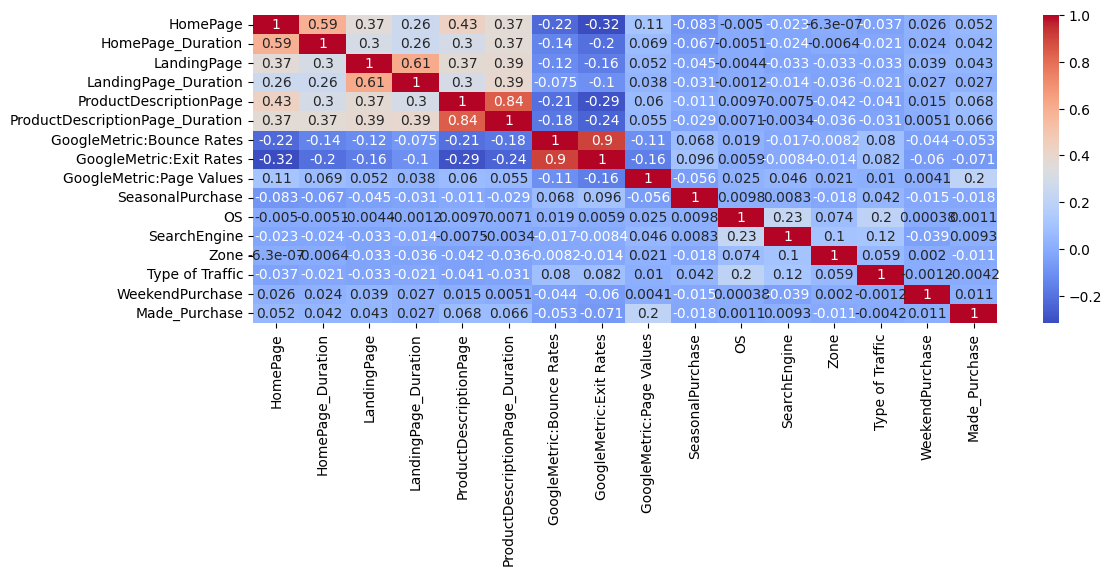

In [8]:
plt.figure(figsize = (12, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

We can see from the above heatmap and correlaation matrix, 'ProductDescriptionPage_Duration' and 'ProductDescriptionPage' and also 'GoogleMetric:Bounce Rates' and 'GoogleMetric:Exit Rates' We will drop one of each grope.


In [9]:
# We can see from the above I am dropping a pair of columns that are highly correlated with another pair of columns to avoid duplicating information.
GPdrop = ['GoogleMetric:Exit Rates', 'ProductDescriptionPage']
df1 = df.drop(columns=GPdrop)
df1

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.666667,0.050000,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,627.500000,0.020000,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.4,Feb,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.0,Feb,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,983.138889,0.015385,0.0,0.0,Nov,3.0,2.0,6.0,3.0,Returning_Visitor,Female,Deny,Others,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,252.892857,0.000000,0.0,0.0,May,2.0,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,1143.666667,0.000000,0.0,0.0,Aug,2.0,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,1057.000000,0.000000,0.0,0.0,Mar,2.0,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage_Duration  14731 non-null  float64
 5   GoogleMetric:Bounce Rates        14731 non-null  float64
 6   GoogleMetric:Page Values         14731 non-null  float64
 7   SeasonalPurchase                 14731 non-null  float64
 8   Month_SeasonalPurchase           14731 non-null  object 
 9   OS                               14731 non-null  float64
 10  SearchEngine                     14731 non-null  float64
 11  Zone                             14731 non-null  float64
 12  Type of Traffic   

In [11]:
df1.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [12]:
df1cc = ['Month_SeasonalPurchase', 'CustomerType ', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']

In [13]:
# we import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

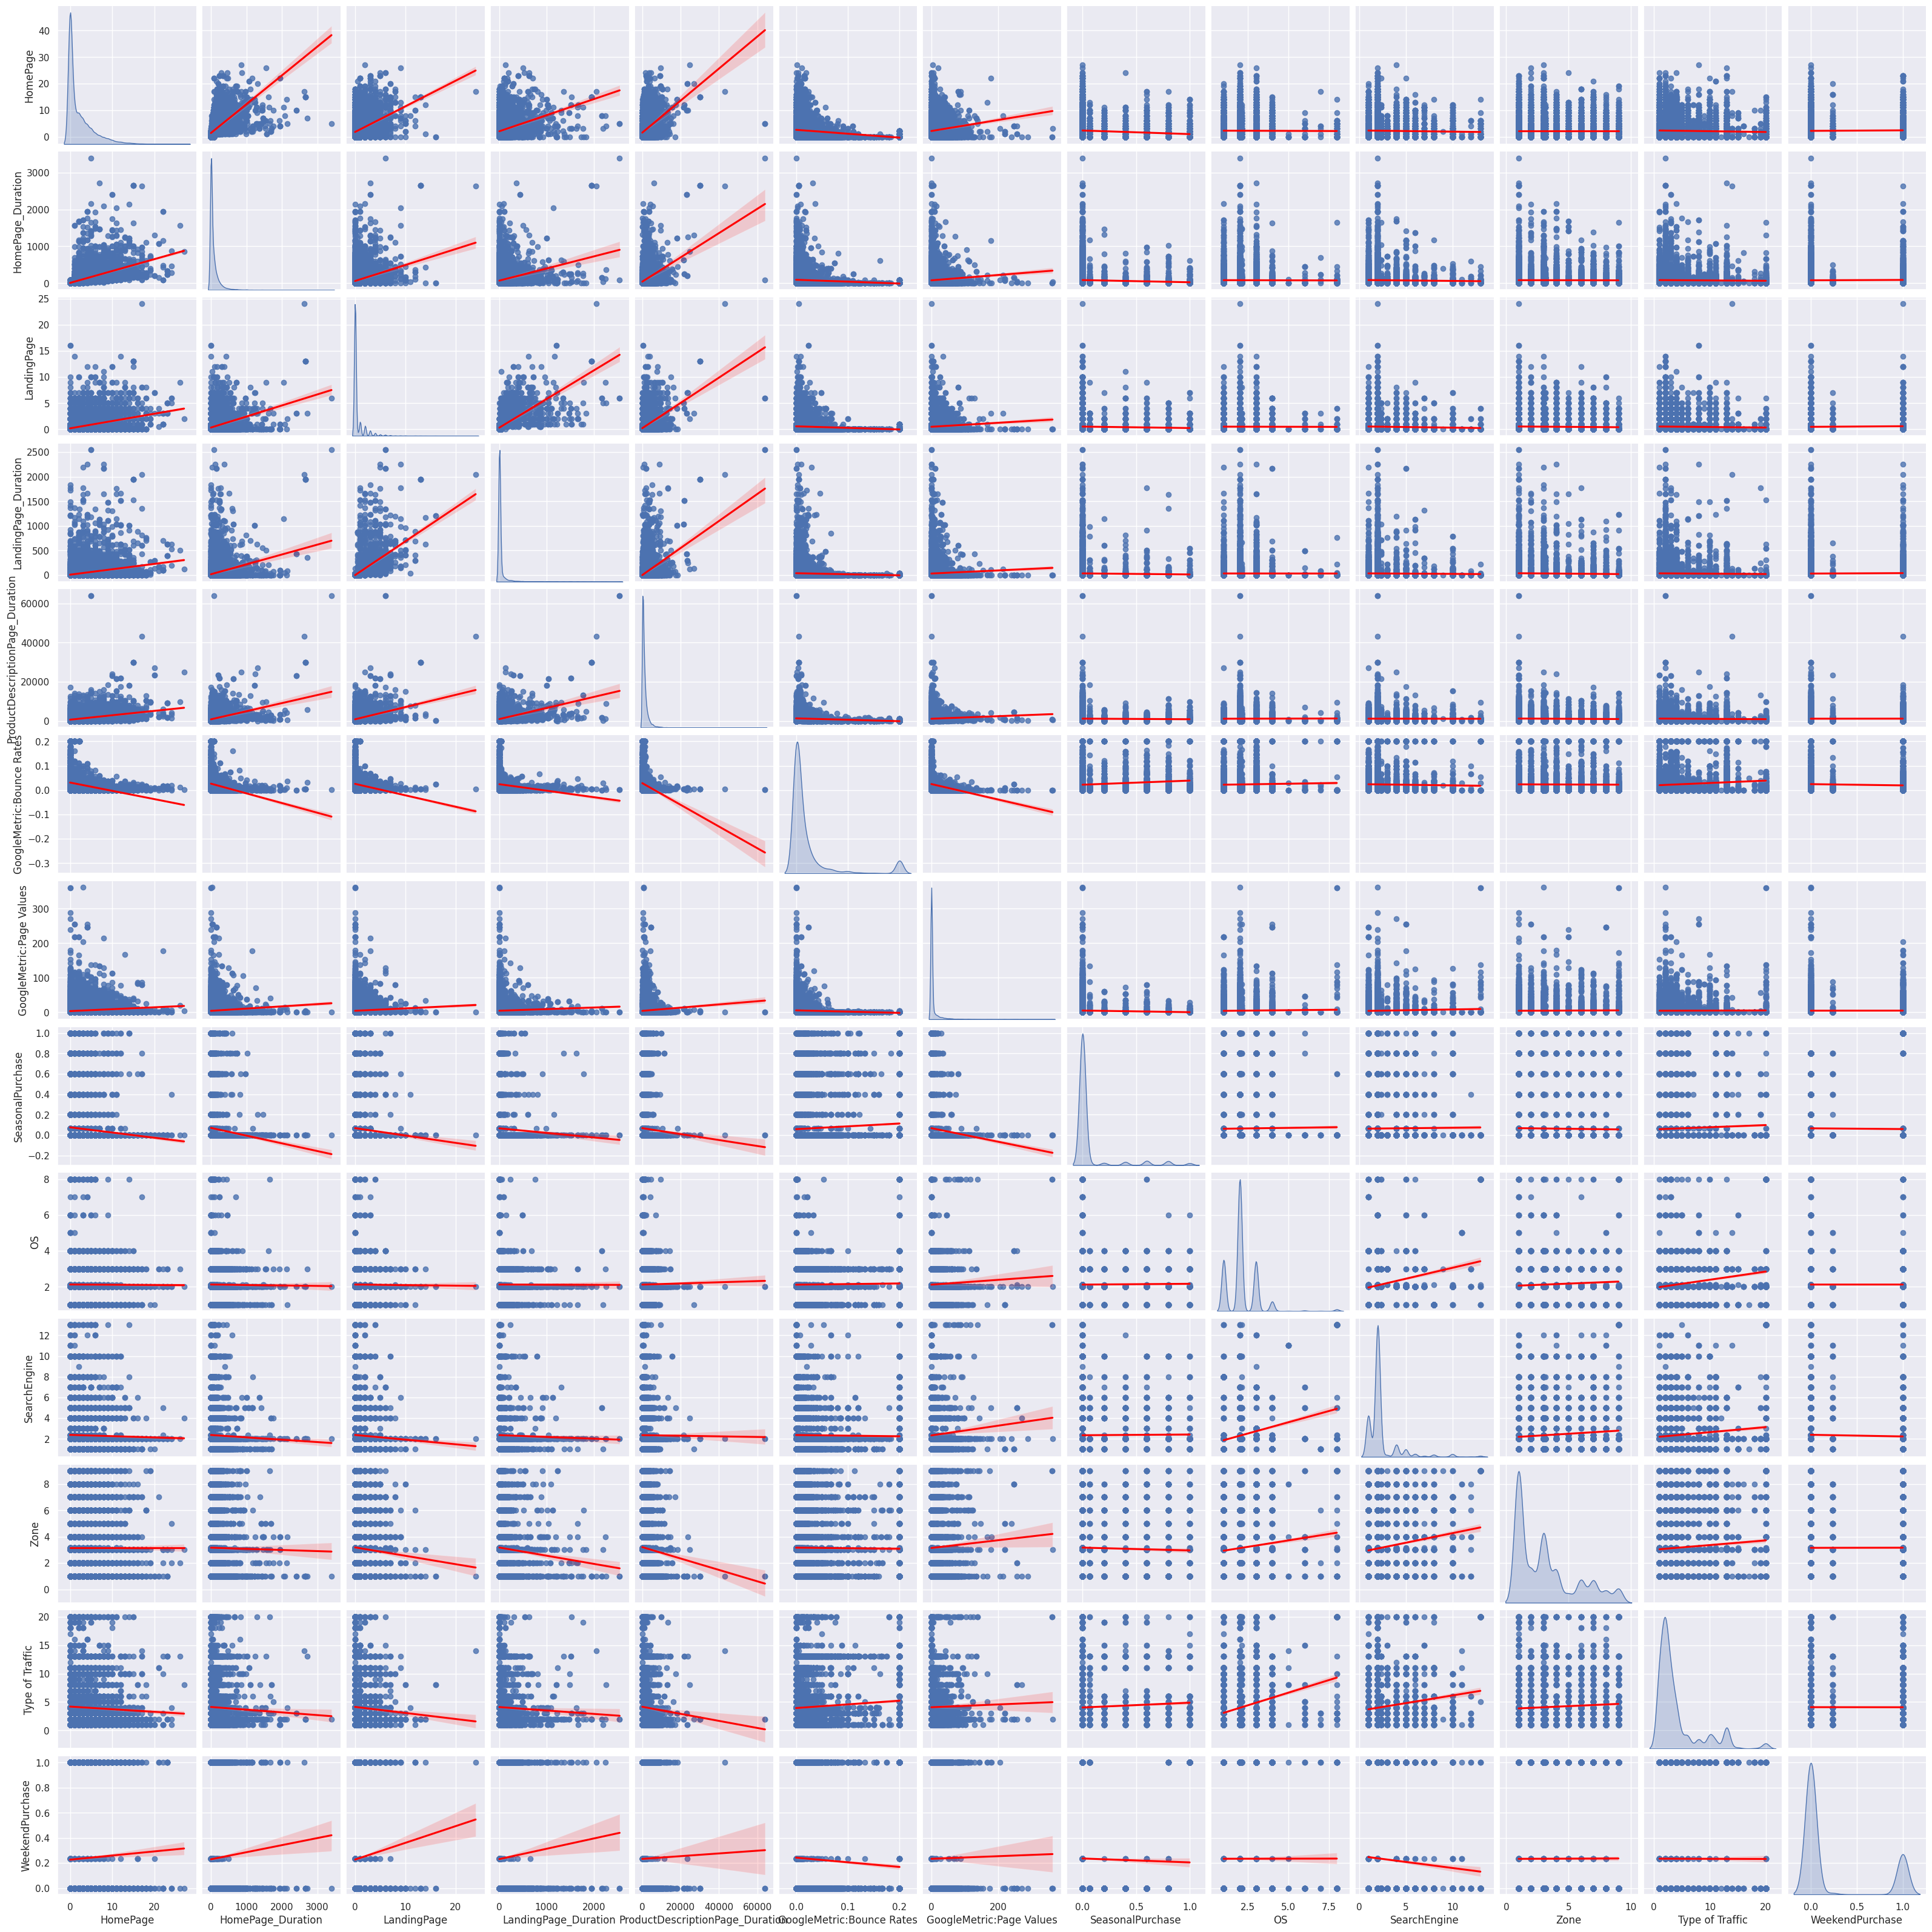

In [14]:
# with seaborn pairplot we can observe the correlations between numerical features.
df1nc = ['HomePage','HomePage_Duration','LandingPage','LandingPage_Duration','ProductDescriptionPage_Duration','GoogleMetric:Bounce Rates'
 ,'GoogleMetric:Page Values','SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','WeekendPurchase']

sns.pairplot(df1[df1nc], diag_kind = 'kde', kind = 'reg', plot_kws = {'line_kws':{'color':'red'}})
plt.show()

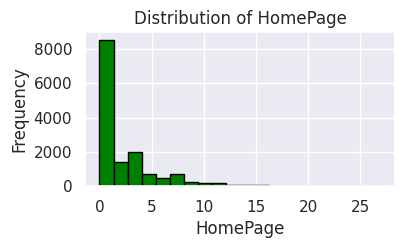

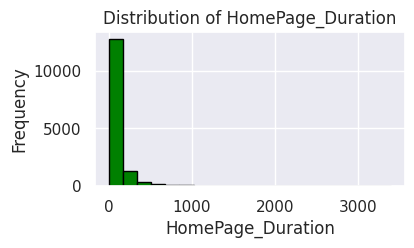

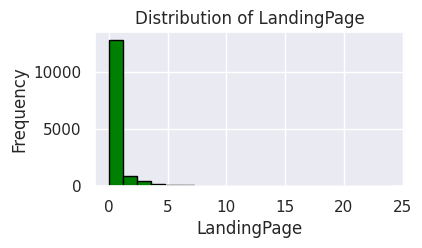

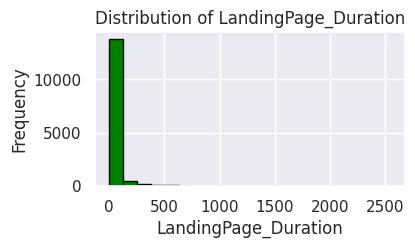

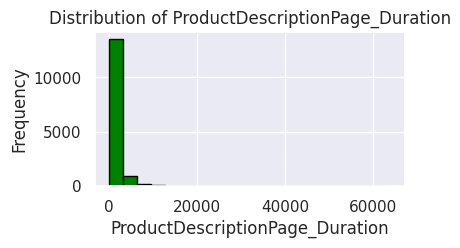

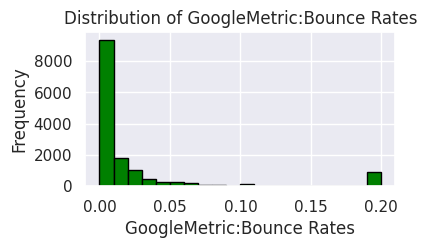

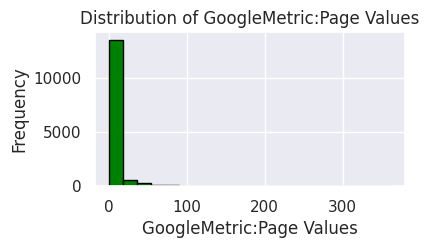

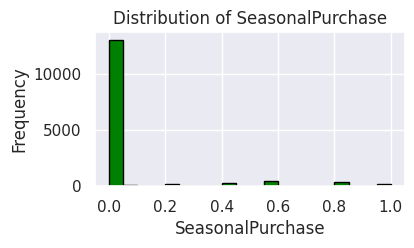

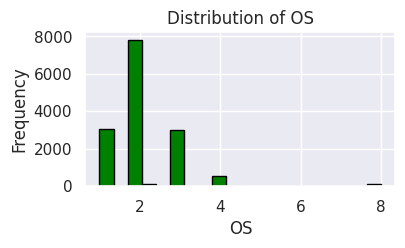

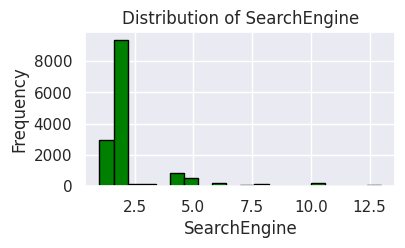

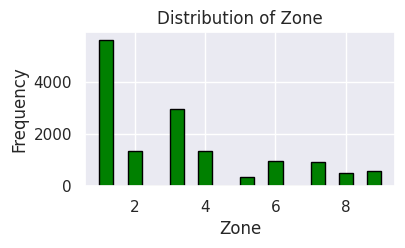

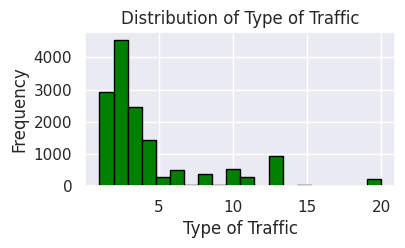

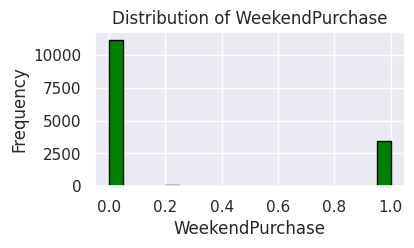

In [15]:
# The below plts are showning the distibution of numerical data which are maximum right skews.
for col in df1nc:
    plt.figure(figsize=(4, 2))
    plt.hist(df1[col], bins=20, color='green', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

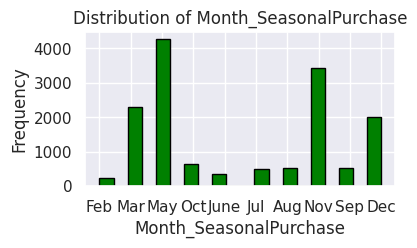

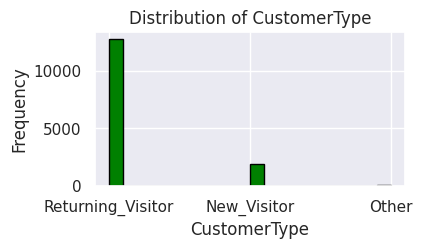

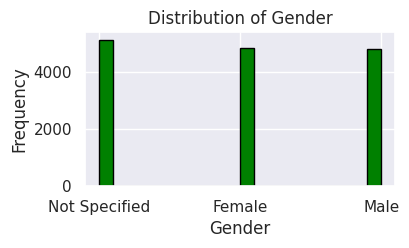

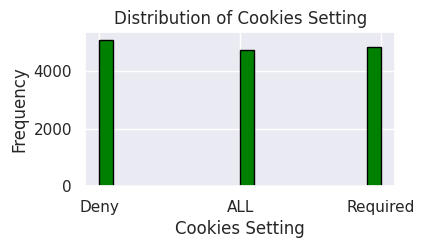

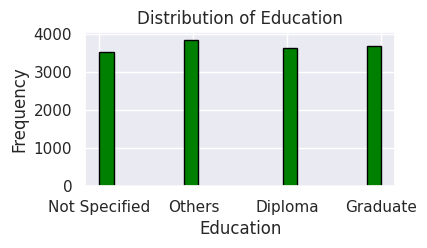

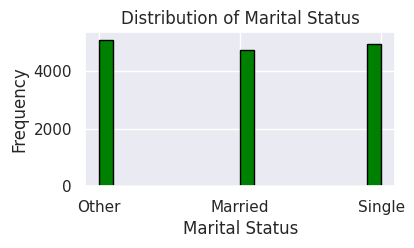

In [16]:
# Categorical data.
df1cc = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']
for col in df1cc:
    plt.figure(figsize=(4, 2))
    plt.hist(df1[col], bins=20, color='green', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [17]:
# numerical data is being transformed for reducing skewness by logathom.
skewnc= df1nc
df1[skewnc] = df1[skewnc].apply(lambda x: np.log1p(x))

df1.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.0,0.0,0.0,0.000000,0.182322,0.0,0.000000,Feb,1.609438,0.693147,2.302585,1.386294,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.000000,False
1,0.000000,0.0,0.0,0.0,1.299283,0.048790,0.0,0.000000,Feb,1.386294,1.098612,1.098612,1.609438,Returning_Visitor,Female,Deny,Others,Married,0.000000,False
2,0.000000,0.0,0.0,0.0,6.443336,0.019803,0.0,0.000000,Feb,1.386294,1.386294,0.693147,1.609438,Returning_Visitor,Female,ALL,Others,Married,0.693147,False
3,0.000000,0.0,0.0,0.0,0.000000,0.182322,0.0,0.336472,Feb,1.098612,1.609438,1.386294,1.386294,Returning_Visitor,Male,ALL,Diploma,Single,0.000000,False
4,0.693147,0.0,0.0,0.0,0.000000,0.182322,0.0,0.000000,Feb,0.693147,1.098612,0.693147,1.791759,Returning_Visitor,Male,Deny,Diploma,Other,0.693147,False


In [18]:
# Categorical data are encoding by 0 or 1.
df1endC = pd.get_dummies(df1, columns=df1cc)
df1endC


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,1.609438,0.693147,...,0,1,0,0,0,1,0,0,1,0
1,0.000000,0.000000,0.000000,0.000000,1.299283,0.048790,0.0,0.000000,1.386294,1.098612,...,0,1,0,0,0,0,1,1,0,0
2,0.000000,0.000000,0.000000,0.000000,6.443336,0.019803,0.0,0.000000,1.386294,1.386294,...,1,0,0,0,0,0,1,1,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.336472,1.098612,1.609438,...,1,0,0,1,0,0,0,0,0,1
4,0.693147,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,0.693147,1.098612,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0.693147,1.609438,0.000000,0.000000,6.891767,0.015267,0.0,0.000000,1.386294,1.098612,...,0,1,0,0,0,0,1,1,0,0
14727,2.197225,4.770886,1.098612,4.060443,5.536912,0.000000,0.0,0.000000,1.098612,1.098612,...,1,0,0,1,0,0,0,1,0,0
14728,1.098612,4.338597,1.098612,6.482801,7.042869,0.000000,0.0,0.000000,1.098612,1.098612,...,0,0,1,0,0,0,1,0,0,1
14729,0.000000,0.000000,0.000000,0.000000,6.964136,0.000000,0.0,0.000000,1.098612,1.609438,...,0,0,1,0,0,1,0,1,0,0


In [19]:
df1

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,Feb,1.609438,0.693147,2.302585,1.386294,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.000000,False
1,0.000000,0.000000,0.000000,0.000000,1.299283,0.048790,0.0,0.000000,Feb,1.386294,1.098612,1.098612,1.609438,Returning_Visitor,Female,Deny,Others,Married,0.000000,False
2,0.000000,0.000000,0.000000,0.000000,6.443336,0.019803,0.0,0.000000,Feb,1.386294,1.386294,0.693147,1.609438,Returning_Visitor,Female,ALL,Others,Married,0.693147,False
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.336472,Feb,1.098612,1.609438,1.386294,1.386294,Returning_Visitor,Male,ALL,Diploma,Single,0.000000,False
4,0.693147,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,Feb,0.693147,1.098612,0.693147,1.791759,Returning_Visitor,Male,Deny,Diploma,Other,0.693147,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0.693147,1.609438,0.000000,0.000000,6.891767,0.015267,0.0,0.000000,Nov,1.386294,1.098612,1.945910,1.386294,Returning_Visitor,Female,Deny,Others,Married,0.000000,True
14727,2.197225,4.770886,1.098612,4.060443,5.536912,0.000000,0.0,0.000000,May,1.098612,1.098612,1.098612,1.609438,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.000000,True
14728,1.098612,4.338597,1.098612,6.482801,7.042869,0.000000,0.0,0.000000,Aug,1.098612,1.098612,1.609438,1.098612,Returning_Visitor,Not Specified,Required,Others,Single,0.000000,True
14729,0.000000,0.000000,0.000000,0.000000,6.964136,0.000000,0.0,0.000000,Mar,1.098612,1.609438,1.609438,0.693147,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.000000,True


In [20]:
# boolen data has been transformed as int.
df1['Made_Purchase'] = df1['Made_Purchase'].astype(int)
df1

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,Feb,1.609438,0.693147,2.302585,1.386294,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,1.299283,0.048790,0.0,0.000000,Feb,1.386294,1.098612,1.098612,1.609438,Returning_Visitor,Female,Deny,Others,Married,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,6.443336,0.019803,0.0,0.000000,Feb,1.386294,1.386294,0.693147,1.609438,Returning_Visitor,Female,ALL,Others,Married,0.693147,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.336472,Feb,1.098612,1.609438,1.386294,1.386294,Returning_Visitor,Male,ALL,Diploma,Single,0.000000,0
4,0.693147,0.000000,0.000000,0.000000,0.000000,0.182322,0.0,0.000000,Feb,0.693147,1.098612,0.693147,1.791759,Returning_Visitor,Male,Deny,Diploma,Other,0.693147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0.693147,1.609438,0.000000,0.000000,6.891767,0.015267,0.0,0.000000,Nov,1.386294,1.098612,1.945910,1.386294,Returning_Visitor,Female,Deny,Others,Married,0.000000,1
14727,2.197225,4.770886,1.098612,4.060443,5.536912,0.000000,0.0,0.000000,May,1.098612,1.098612,1.098612,1.609438,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.000000,1
14728,1.098612,4.338597,1.098612,6.482801,7.042869,0.000000,0.0,0.000000,Aug,1.098612,1.098612,1.609438,1.098612,Returning_Visitor,Not Specified,Required,Others,Single,0.000000,1
14729,0.000000,0.000000,0.000000,0.000000,6.964136,0.000000,0.0,0.000000,Mar,1.098612,1.609438,1.609438,0.693147,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.000000,1


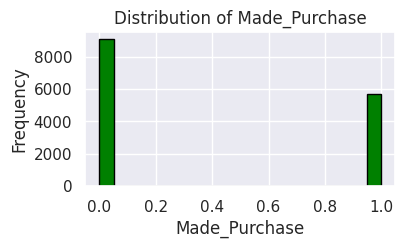

In [21]:
 plt.figure(figsize=(4, 2))
 plt.hist(data = df1, x = 'Made_Purchase', bins=20, color='green', edgecolor='black')
 plt.title(f'Distribution of Made_Purchase')
 plt.xlabel('Made_Purchase')
 plt.ylabel('Frequency')
 plt.grid(True)
 plt.show()

In [22]:
# handle imbalanced data
df1['Made_Purchase'].value_counts()

0    9065
1    5666
Name: Made_Purchase, dtype: int64

In [23]:
df1.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [24]:
# numerical dat with transfrom and categorical data with encoding.
x = pd.get_dummies(df1[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
          'Education', 'Marital Status', 'WeekendPurchase']])
y = df1['Made_Purchase']

In [25]:
# Now will splite data as train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Decision tree classifier.


for train

In [26]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)
acc_dt_train =round(decisiontree.score(x_train, y_train) * 100, 2)
print(acc_dt_train)

84.44


In [27]:
Predictions_dt_train = decisiontree.predict(x_train)
confusion_matrix(y_train, Predictions_dt_train)

array([[7166,   14],
       [1820, 2784]])

In [28]:
print(metrics.classification_report(y_train, Predictions_dt_train, digits=3))

              precision    recall  f1-score   support

           0      0.797     0.998     0.887      7180
           1      0.995     0.605     0.752      4604

    accuracy                          0.844     11784
   macro avg      0.896     0.801     0.819     11784
weighted avg      0.875     0.844     0.834     11784



We found that there are imbalance data avaiable. So, we will choose the less impact imbalance algrothithom. These are-

For test

In [29]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(x_test,y_test)
acc_dt_test =round(decisiontree.score(x_test, y_test) * 100, 2)
print(acc_dt_test)

96.13


In [30]:
Predictions_dt_test = decisiontree.predict(x_test)
confusion_matrix(y_test, Predictions_dt_test)

array([[1885,    0],
       [ 114,  948]])

In [31]:
print(metrics.classification_report(y_test, Predictions_dt_test, digits=3))

              precision    recall  f1-score   support

           0      0.943     1.000     0.971      1885
           1      1.000     0.893     0.943      1062

    accuracy                          0.961      2947
   macro avg      0.971     0.946     0.957      2947
weighted avg      0.964     0.961     0.961      2947



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Define DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train DecisionTreeClassifier with best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)

# Predictions on test set
y_pred = best_dt_classifier.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

decisiontree_report = classification_report(y_test, y_pred)

# Displaying classification report
print(decisiontree_report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.6810315575161181
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1885
           1       0.61      0.32      0.42      1062

    accuracy                           0.68      2947
   macro avg       0.65      0.60      0.60      2947
weighted avg       0.67      0.68      0.65      2947



F1 Score: 0.42260442260442266
AUC-ROC: 0.610638552952989


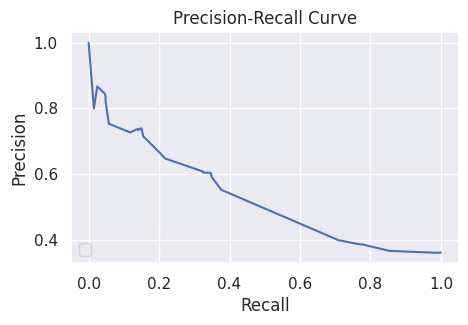

Confusion Matrix:
[[1663  222]
 [ 718  344]]


In [34]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, best_dt_classifier.predict_proba(x_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_dt_classifier.predict_proba(x_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Random Froest Classifier.

In [35]:
# Creating a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Random Forest classifier with best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = best_rf_classifier.predict(x_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

randomforest_report = classification_report(y_test, y_pred)

# Displaying classification report
print(randomforest_report)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6905327451645742
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1885
           1       0.67      0.28      0.39      1062

    accuracy                           0.69      2947
   macro avg       0.68      0.60      0.59      2947
weighted avg       0.69      0.69      0.65      2947



F1 Score: 0.39361702127659576
AUC-ROC: 0.6093357710540644


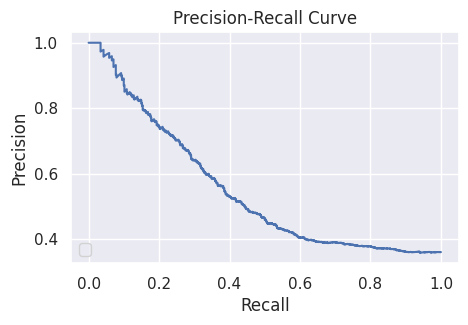

Confusion Matrix:
[[1739  146]
 [ 766  296]]


In [36]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, best_rf_classifier.predict_proba(x_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_classifier.predict_proba(x_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## Naive Bayes Classifier.

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Creating a Naive Bayes classifier
nbc = GaussianNB()

# Define parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=nbc, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Gaussian Naive Bayes classifier with best parameters
best_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred_nb = best_nb_classifier.predict(x_test)

# Calculating the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

# Generating a classification report
nb_report = classification_report(y_test, y_pred_nb)

# Displaying the classification report
print(nb_report)

Best Parameters: {'var_smoothing': 1e-05}
Accuracy: 0.6202918221920597
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1885
           1       0.47      0.45      0.46      1062

    accuracy                           0.62      2947
   macro avg       0.59      0.58      0.58      2947
weighted avg       0.62      0.62      0.62      2947



F1 Score: 0.39361702127659576


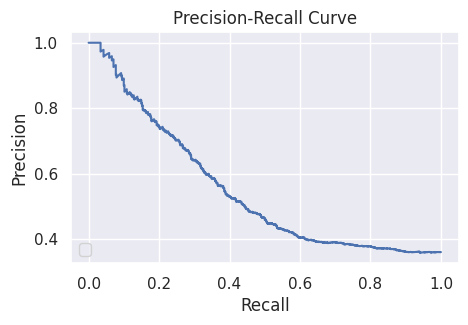

Confusion Matrix:
[[1739  146]
 [ 766  296]]


In [39]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## SVM Classifier.

In [41]:
# Creating an SVM classifier
svmc = SVC(kernel='rbf', C=1.0, gamma='scale', probability = True, random_state=42)

# Training the SVM classifier
svmc.fit(x_train, y_train)

# Making predictions on the test set
y_pred = svmc.predict(x_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

svm_report = classification_report(y_test, y_pred)

# Displaying classification report
print(svm_report)

Accuracy: 0.6827281981676281
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1885
           1       0.62      0.32      0.42      1062

    accuracy                           0.68      2947
   macro avg       0.66      0.60      0.60      2947
weighted avg       0.67      0.68      0.65      2947



F1 Score: 0.41817050404480405
AUC-ROC: 0.590496385879203


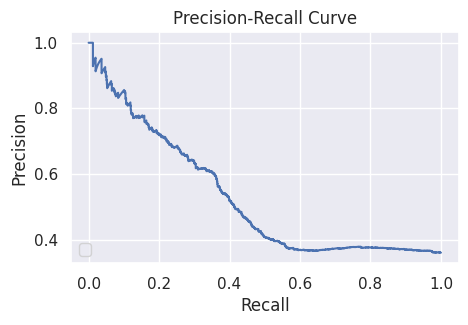

Confusion Matrix:
[[1676  209]
 [ 726  336]]


In [42]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, svmc.predict_proba(x_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, svmc.predict_proba(x_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## Gradient Boosting Classifier.

In [43]:
import warnings
warnings.filterwarnings('ignore')

# Creating a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train Gradient Boosting classifier
gbc.fit(x_train, y_train)

# Making predictions on the test set
y_pred = gbc.predict(x_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

gradientboost_report = classification_report(y_test, y_pred)

# Displaying classification report
print(gradientboost_report)

Accuracy: 0.6871394638615541
              precision    recall  f1-score   support

           0       0.69      0.91      0.79      1885
           1       0.65      0.28      0.40      1062

    accuracy                           0.69      2947
   macro avg       0.67      0.60      0.59      2947
weighted avg       0.68      0.69      0.65      2947



F1 Score: 0.3958060288335518
AUC-ROC: 0.5951850020231084


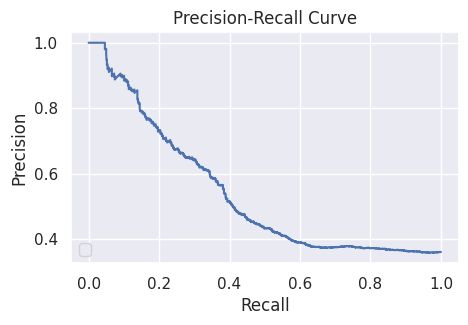

Confusion Matrix:
[[1723  162]
 [ 760  302]]


In [44]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, gbc.predict_proba(x_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, gbc.predict_proba(x_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## Report all medels and its best result.

In [48]:
accuracy_reports = [
    {'Model': 'Decision Tree classifier', 'Accuracy': 0.681, 'Report': decisiontree_report},
    {'Model': 'Random Forest classifier', 'Accuracy': 0.691, 'Report': randomforest_report },
    {'Model': 'KNN', 'Accuracy': 0.620, 'Report': nb_report },
    {'Model': 'SVM', 'Accuracy': 0.683, 'Report': svm_report},
    {'Model': 'Gradient Boosting classifier', 'Accuracy': 0.687, 'Report': gradientboost_report },
]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(accuracy_reports)

# Set the index to the model names
df.set_index('Model', inplace=True)

# Print the DataFrame
print(df)

# Print reports
for idx, row in df.iterrows():
    print("\nModel: ", idx)
    print("Accuracy: ", row['Accuracy'])
    print("Report: \n", row['Report'])

                              Accuracy  \
Model                                    
Decision Tree classifier         0.681   
Random Forest classifier         0.691   
KNN                              0.620   
SVM                              0.683   
Gradient Boosting classifier     0.687   

                                                                         Report  
Model                                                                            
Decision Tree classifier                    precision    recall  f1-score   ...  
Random Forest classifier                    precision    recall  f1-score   ...  
KNN                                         precision    recall  f1-score   ...  
SVM                                         precision    recall  f1-score   ...  
Gradient Boosting classifier                precision    recall  f1-score   ...  

Model:  Decision Tree classifier
Accuracy:  0.681
Report: 
               precision    recall  f1-score   support

           0   